In [1]:
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv
from typing import TypedDict
from langchain_openai import ChatOpenAI

In [2]:
load_dotenv()

True

In [3]:
class blog_state(TypedDict):
    topic: str
    outline: str 
    blog_content: str 

In [4]:
model = ChatOpenAI()

In [5]:
def get_blog_outline(state: blog_state)->blog_state:
    topic = state['topic']

    prompt = f'Generate a detailed outline for the given topic - {topic}'

    outline = model.invoke(prompt).content

    state['outline'] = outline 

    return state

In [6]:
def get_blog_content(state: blog_state)->blog_state:
    outline = state['outline']

    prompt = f'Generate a brief blog content for the following outline - {outline}'

    blog_content = model.invoke(prompt).content

    state['blog_content'] = blog_content
    return state

In [7]:
graph = StateGraph(blog_state)

graph.add_node('get_blog_outline',get_blog_outline)
graph.add_node('get_blog_content',get_blog_content)

graph.add_edge(START,'get_blog_outline')
graph.add_edge('get_blog_outline','get_blog_content')
graph.add_edge('get_blog_content',END)

workflow = graph.compile()

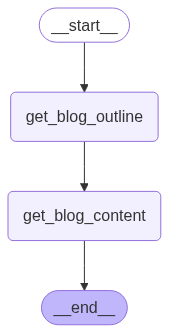

In [8]:
workflow

In [9]:
initial_state = {'topic':"Inflation in India"}

result = workflow.invoke(initial_state)

print(result)

{'topic': 'Inflation in India', 'outline': 'I. Introduction\n    A. Definition of inflation\n    B. Importance of analyzing inflation\n    C. Overview of the current inflation situation in India\n\nII. Causes of Inflation in India\n    A. Demand-pull inflation\n        1. Increase in consumer spending\n        2. Rise in government spending\n    B. Cost-push inflation\n        1. Increase in production costs\n        2. External factors such as global oil prices\n\nIII. Impact of Inflation in India\n    A. Effect on consumers\n        1. Decreased purchasing power\n        2. Rise in cost of living\n        3. Impact on savings and investments\n    B. Effect on businesses\n        1. Increase in production costs\n        2. Impact on profit margins\n        3. Change in pricing strategies\n    C. Effect on economy\n        1. Reduced economic growth\n        2. Impact on employment levels\n        3. Potential for stagflation\n\nIV. Measures to Control Inflation in India\n    A. Moneta

In [11]:
result['blog_content']

'Inflation is a term that we often hear in economic discussions, but what does it really mean? In simple terms, inflation is the rate at which the general level of prices for goods and services is rising, leading to a decrease in purchasing power. Inflation can have a significant impact on consumers, businesses, and the overall economy. In India, inflation has been a persistent problem, with various factors contributing to its rise.\n\nOne of the main causes of inflation in India is demand-pull inflation, where an increase in consumer and government spending leads to a rise in prices. Additionally, cost-push inflation can occur when production costs increase, or external factors such as global oil prices impact the economy. The impact of inflation on consumers is significant, leading to decreased purchasing power, a rise in the cost of living, and affecting savings and investments. Businesses also face challenges due to inflation, with increased production costs, impacting profit margi